In [ ]:
import pandas as pd

housing = pd.read_csv('Data/housing.csv', index_col=0)
housing.head()
# Display the first few rows of the DataFrame

,INDUS,NOX,RM,MEDV
LSTAT,,,,
4.98,2.31,0.538,6.575,24.0
9.14,7.07,0.469,6.421,21.6
4.03,7.07,0.469,7.185,34.7
2.94,2.18,0.458,6.998,33.4
5.33,2.18,0.458,7.147,36.2


In [ ]:
import pandas as pd
housing = pd.read_csv('data/housing.csv', index_col=0)
housing.head()  
housing.cov()
# Calculate the covariance matrix of the DataFrame

,INDUS,NOX,RM,MEDV
INDUS,1.000000,0.320395,-0.506836,-0.489590
NOX,0.320395,1.000000,-0.600177,-0.633308
RM,-0.506836,-0.600177,1.000000,0.881014
MEDV,-0.489590,-0.633308,0.881014,1.000000


In [9]:
import pandas as pd
housing = pd.read_csv('data/housing.csv', index_col=0)
housing.head()  
housing.corr()
# Calculate the correlation matrix of the DataFrame

,INDUS,NOX,RM,MEDV
INDUS,1.000000,0.320395,-0.506836,-0.489590
NOX,0.320395,1.000000,-0.600177,-0.633308
RM,-0.506836,-0.600177,1.000000,0.881014
MEDV,-0.489590,-0.633308,0.881014,1.000000


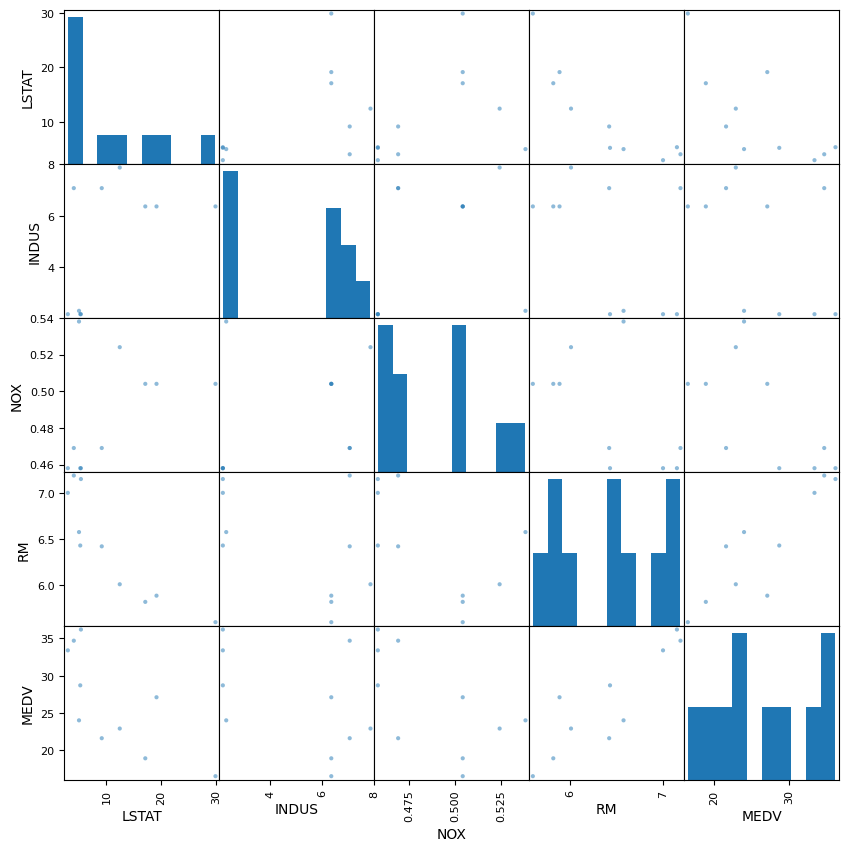

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

housing = pd.read_csv('Data/housing.csv')

scatter_matrix(housing, figsize=(10, 10))
plt.show()
# Create a scatter matrix plot of the DataFrame


<Axes: xlabel='LSTAT', ylabel='MEDV'>

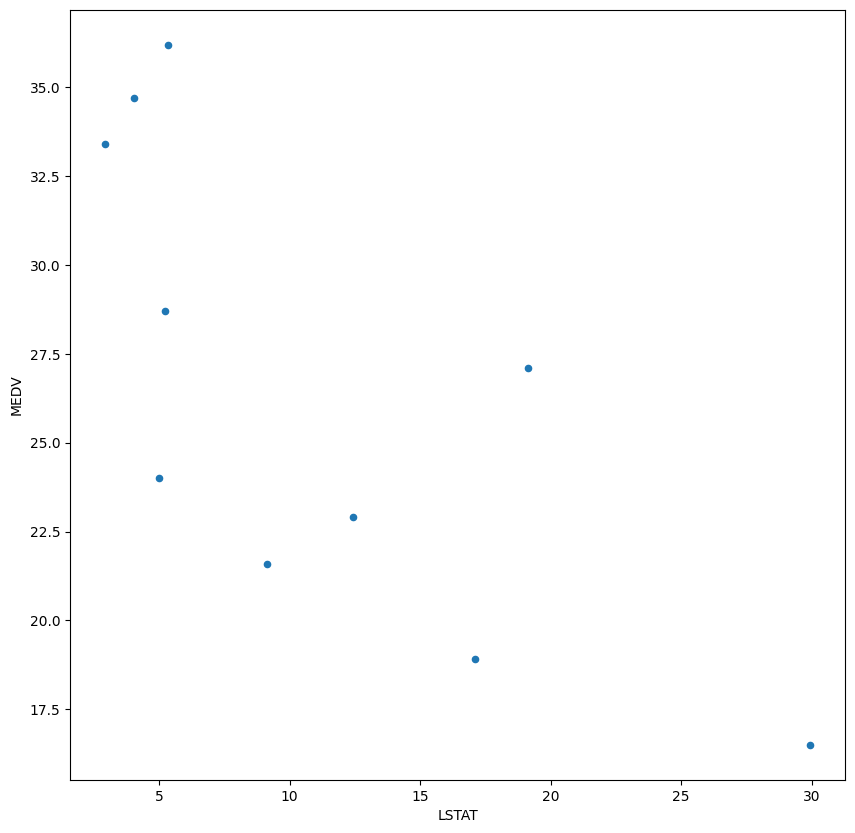

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

housing = pd.read_csv('Data/housing.csv')

housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10))
plt.show()
# Create a scatter plot of 'LSTAT' vs 'MEDV' columns

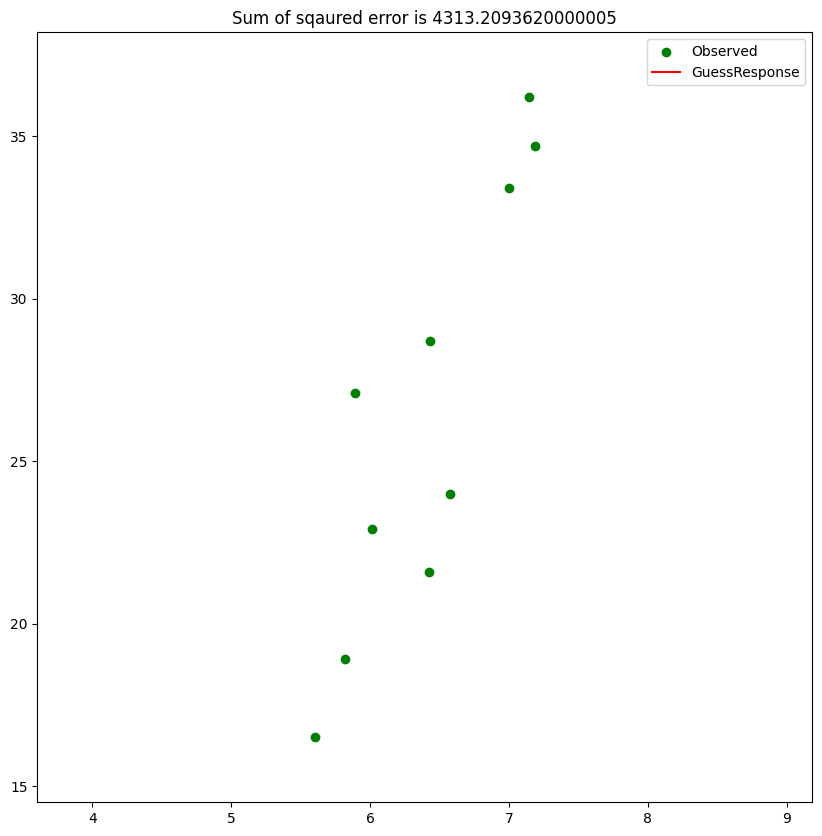

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

housing = pd.read_csv('Data/housing.csv')
b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['RM']


# This show how far is our guess response from the true response
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']


# plots estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()
#this code creates a scatter plot of 'RM' vs 'MEDV' with a guessed linear response line and displays the sum of squared errors

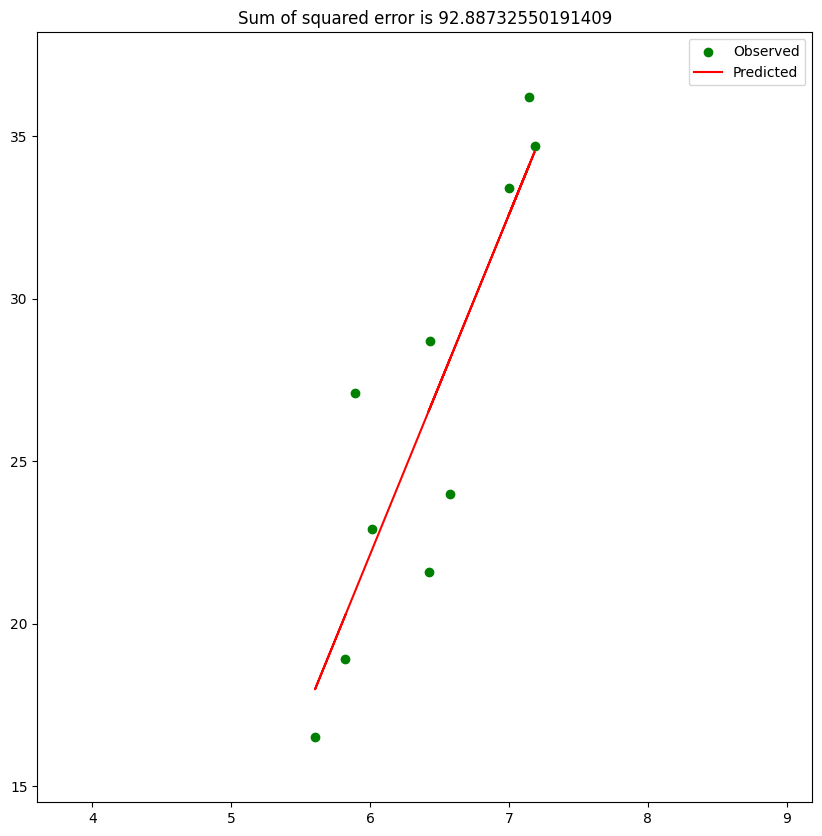

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     27.74
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           0.000758
Time:                        15:24:20   Log-Likelihood:                -25.333
No. Observations:                  10   AIC:                             54.67
Df Residuals:                       8   BIC:                             55.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.6313     12.772     -3.181      0.0

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

housing = pd.read_csv('Data/housing.csv')

# real regression model
X = housing[['RM']]
X = sm.add_constant(X)
y = housing['MEDV']
model = sm.OLS(y, X).fit()

# predicted values
housing['GuessResponse'] = model.predict(X)

# residuals
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']

# plot
plt.figure(figsize=(10, 10))
plt.title('Sum of squared error is {}'.format((housing['observederror']**2).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='Predicted')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

# regression summary
print(model.summary())


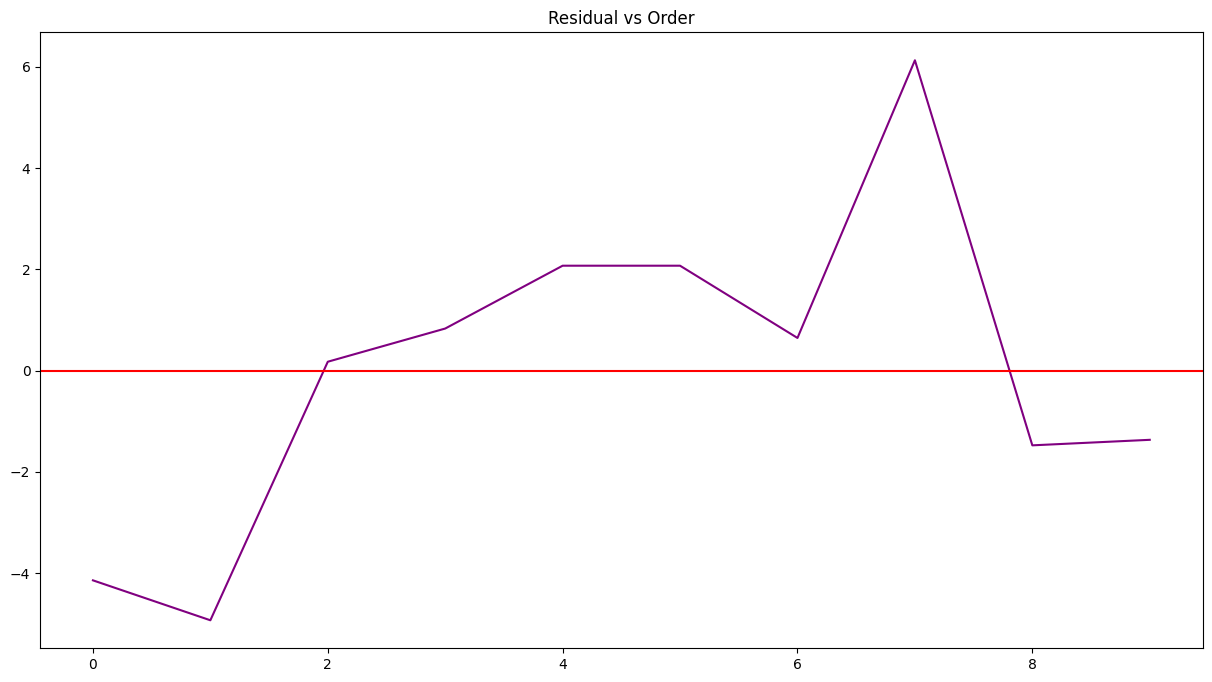

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     27.74
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           0.000758
Time:                        15:27:03   Log-Likelihood:                -25.333
No. Observations:                  10   AIC:                             54.67
Df Residuals:                       8   BIC:                             55.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.6313     12.772     -3.181      0.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

housing = pd.read_csv('Data/housing.csv')

# Build regression model
X = housing[['RM']]
X = sm.add_constant(X)
y = housing['MEDV']

model = sm.OLS(y, X).fit()

# Compute predictions
housing['predicted'] = model.predict(X)

# Compute residuals
housing['error'] = housing['MEDV'] - housing['predicted']

# Plot residuals vs order
plt.figure(figsize=(15, 8))
plt.title('Residual vs Order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

# Print summary (optional)
print(model.summary())
# This code builds a linear regression model to predict 'MEDV' from 'RM', computes.


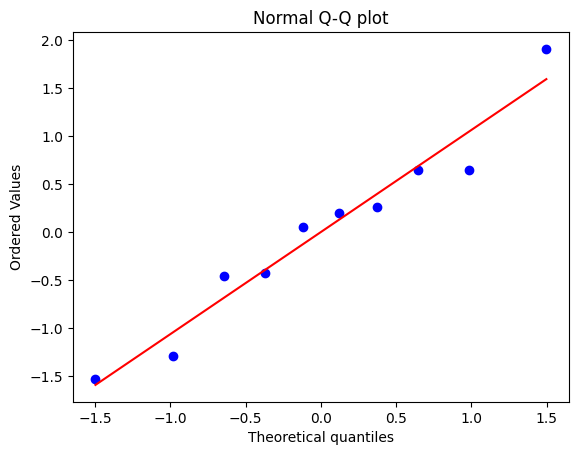

In [ ]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()
# This code generates a Q-Q plot to assess the normality of the residuals from the regression model

Index(['INDUS', 'NOX', 'RM', 'MEDV'], dtype='object')


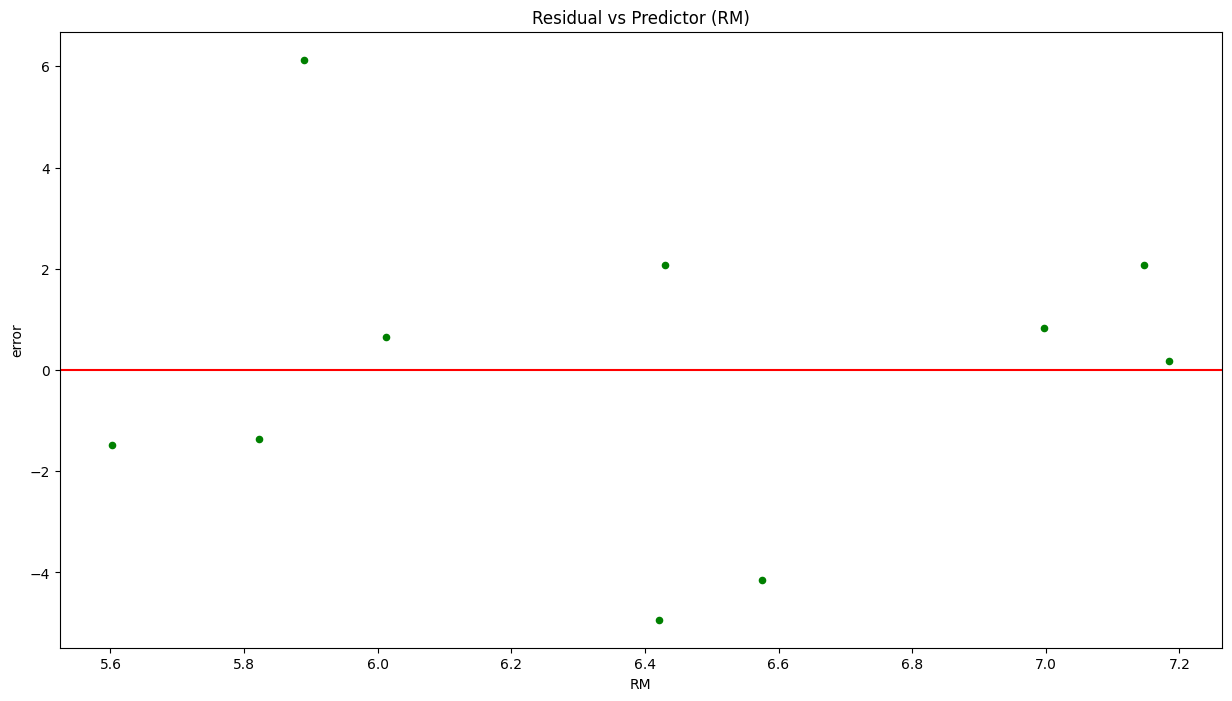

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     27.74
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           0.000758
Time:                        15:31:18   Log-Likelihood:                -25.333
No. Observations:                  10   AIC:                             54.67
Df Residuals:                       8   BIC:                             55.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.6313     12.772     -3.181      0.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
housing = pd.read_csv('Data/housing.csv', index_col=0)
print(housing.columns)

# Build regression model using RM instead of LSTAT
X = housing[['RM']]
X = sm.add_constant(X)
y = housing['MEDV']

model = sm.OLS(y, X).fit()

# Compute predictions + residuals
housing['predicted'] = model.predict(X)
housing['error'] = housing['MEDV'] - housing['predicted']

# Plot residual vs RM
housing.plot(kind='scatter', x='RM', y='error', figsize=(15, 8), color='green')
plt.axhline(y=0, color='red')
plt.title('Residual vs Predictor (RM)')
plt.show()

print(model.summary())
# This code builds a linear regression model to predict 'MEDV' from 'RM', computes residuals, and plots residuals against the predictor variable 'RM'.


